In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, adjusted_rand_score

In [2]:
iris = load_iris()
#Extraer los datos (medidas de las flores)
iris_data = iris.data

# Mostramos tabla con los datos
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd['species'] = pd.Categorical.from_codes(iris.target, iris.target_names) # Establecemos correlación entre número de etiqueta y nombre de columnas
iris_data_pd



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


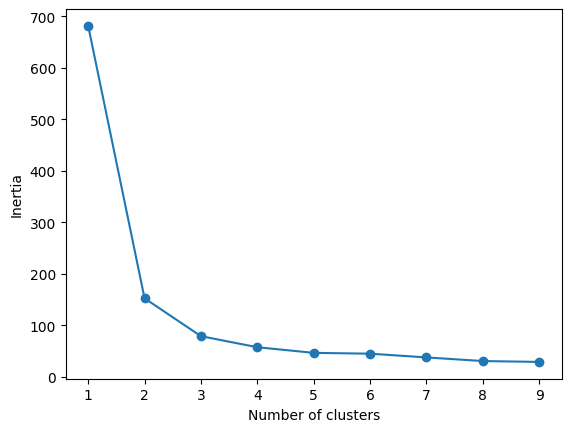

In [3]:
inertia = [] # Guardamos las inercias (desviaciones frente a los centroides)
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(iris_data);
  inertia.append(kmeans.inertia_)

# Graficamos las inercias
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Método Shilouette

El **Método de la Silueta** es una técnica para evaluar la calidad de los clústeres creados por un algoritmo (como K-means) y determinar el número óptimo de grupos ($k$).

Funciona calculando un puntaje (coeficiente de silueta) para cada punto de datos, basándose en dos métricas de distancia:

1.  **Cohesión ($a$):** Es la distancia promedio entre el punto y todos los demás puntos dentro de su **mismo clúster**. Un valor bajo indica que el punto está bien agrupado.
2.  **Separación ($b$):** Es la distancia promedio entre el punto y todos los puntos del **clúster vecino más cercano**. Un valor alto indica que el punto está bien separado de otros grupos.

**El Coeficiente de Silueta ($s$):**
Se calcula comparando estas dos distancias ($b - a$). El resultado varía entre **-1 y 1**:

* **Cercano a +1:** El punto está correctamente clasificado (cerca de su grupo y lejos de los demás).
* **Cercano a 0:** El punto está en la frontera entre dos clústeres (los grupos se solapan).
* **Cercano a -1:** El punto probablemente fue asignado al clúster incorrecto (está más cerca del grupo vecino).

Para elegir el mejor número de clústeres ($k$), se calcula el **promedio** de los coeficientes de todos los puntos para cada $k$. El $k$ que tenga el promedio más alto (más cercano a 1) suele ser la mejor opción.

**Diferencia con el Codo**: Mientras que en el método del codo buscas el punto donde la inercia deja de disminuir bruscamente (el "codo"), en el método de la silueta buscas el pico máximo (el valor más alto).

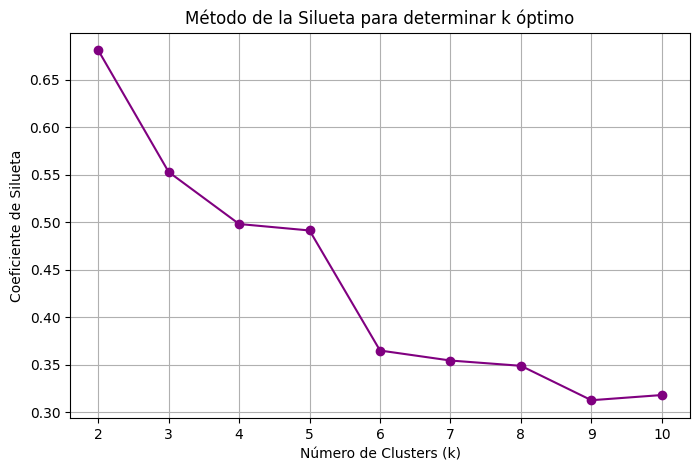

El número óptimo de clusters según Silhouette es: 2 (Score: 0.6810)


In [4]:
from sklearn.metrics import silhouette_score

# Lista para guardar los coeficientes de silueta
silhouette_coefficients = []

# Iteramos para k desde 2 hasta 10 (Silhouette no funciona con k=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(iris_data)
    score = silhouette_score(iris_data, kmeans.labels_)
    silhouette_coefficients.append(score)

# Graficamos los resultados
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_coefficients, marker='o', color='purple')
plt.xticks(range(2, 11))
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Coeficiente de Silueta")
plt.title("Método de la Silueta para determinar k óptimo")
plt.grid(True)
plt.show()

# Imprimimos el k con el mejor puntaje
max_score = max(silhouette_coefficients)
best_k = range(2, 11)[silhouette_coefficients.index(max_score)]
print(f"El número óptimo de clusters según Silhouette es: {best_k} (Score: {max_score:.4f})")

In [5]:
# n_init=10 -> Se ejecuta 10 veces (centroides inicializados en posiciones diferentes) y devuelve el resultado con menor inercia
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(iris_data_pd.iloc[:,2:4]) # Utilizamos solo 2 dimensiones (longitud del pétalo - 2, ancho pétalo - 3)

labels = kmeans.labels_ # Etiquetas
centroids = kmeans.cluster_centers_ # Centros (finales) de los clusters
print(labels)
print(centroids)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]
[[1.462      0.246     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


In [6]:
# Añadimos las etiquetas predichas al dataset
iris_data_pd['cluster_kmeans'] = labels
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster_kmeans
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


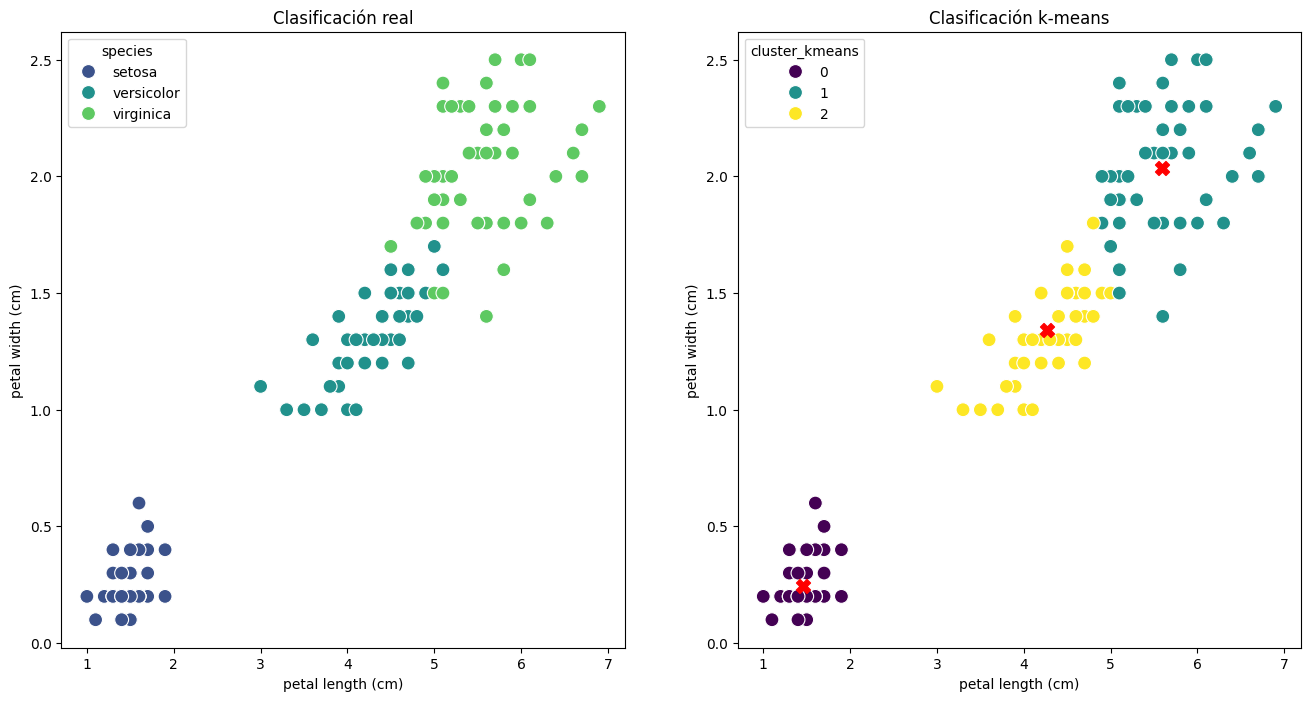

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico del dataset con las etiquetas originales
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='species', ax=axes[0], palette='viridis', s=100)
axes[0].set_title('Clasificación real')

# Gráfico del dataset con los clusters asignados por k-means
sns.scatterplot(data=iris_data_pd, x='petal length (cm)', y='petal width (cm)', hue='cluster_kmeans', ax=axes[1], palette='viridis', s=100)
axes[1].set_title('Clasificación k-means')
axes[1].scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label="Centroides")

plt.show()

In [8]:
# Matríz de confusión
contingency_matrix = pd.crosstab(iris.target, labels, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                 50   0   0
1                  0   2  48
2                  0  46   4


In [9]:
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
# Compara qué tan similares son dos agrupaciones. 1.0 es una coincidencia perfecta.
ari = adjusted_rand_score(iris.target, labels)
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.8857


In [11]:
# Mapeando los clusters generados por kmeans para que coincidan con las observaciones
y_pred_mapped = np.copy(labels)
y_pred_mapped[labels==1] = 0
y_pred_mapped[labels==0] = 2
y_pred_mapped[labels==2] = 1

contingency_matrix = pd.crosstab(iris.target, y_pred_mapped, rownames=['Clase Real'], colnames=['Clúster Predicho'])
print("\nTabla de Contingencia (Matriz de Confusión):")
print(contingency_matrix)


Tabla de Contingencia (Matriz de Confusión):
Clúster Predicho   0   1   2
Clase Real                  
0                  0   0  50
1                  2  48   0
2                 46   4   0


In [12]:
accuracy = accuracy_score(iris.target, y_pred_mapped)
print(f"Precisión (mapeando etiquetas): {accuracy:.4f} ({accuracy*100:.2f}%)")

Precisión (mapeando etiquetas): 0.3200 (32.00%)
